[*********************100%%**********************]  29 of 29 completed


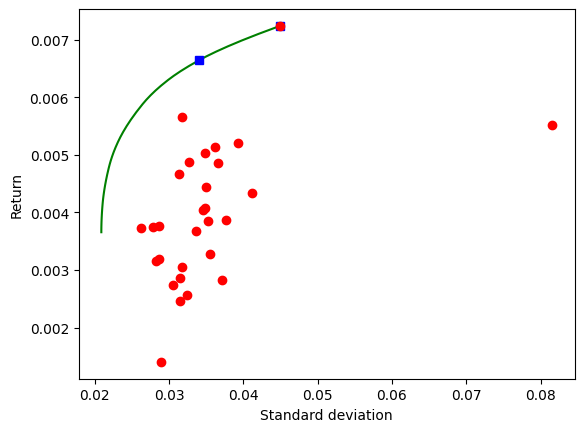

In [7]:
import numpy as np
import scipy.sparse as sp
import yfinance as yf
import cvxpy as cp
import matplotlib.pyplot as plt
import scipy.stats as spstats

companies = ["AKBNK.IS", "ALARK.IS", "ARCLK.IS", "ASELS.IS", "BIMAS.IS", "EKGYO.IS", "ENKAI.IS",
             "EREGL.IS", "FROTO.IS", "GARAN.IS", "GUBRF.IS", "HEKTS.IS", "ISCTR.IS", "KCHOL.IS",
             "KONTR.IS", "KOZAL.IS", "KRDMD.IS", "ODAS.IS", "OYAKC.IS", "PETKM.IS", "PGSUS.IS",
             "SAHOL.IS", "SASA.IS", "SISE.IS", "TCELL.IS", "THYAO.IS", "TOASO.IS", "TUPRS.IS", "YKBNK.IS"]

cp_data = yf.download(companies, start='2022-01-01', end='2023-11-30')['Adj Close']


returns = cp_data.pct_change().dropna()
mu = returns.mean().values.reshape(-1, 1)
Sigma = returns.cov().values

np.random.seed(1)
n = len(companies)
w = cp.Variable(n)
gamma = cp.Parameter(nonneg=True)
ret = mu.T @ w
risk = cp.quad_form(w, Sigma)
prob = cp.Problem(cp.Maximize(ret - gamma * risk), [cp.sum(w) == 1, w >= 0])

SAMPLES = 100
risk_data = np.zeros(SAMPLES)
ret_data = np.zeros(SAMPLES)
gamma_vals = np.logspace(-2, 3, num=SAMPLES)
for i in range(SAMPLES):
    gamma.value = gamma_vals[i]
    prob.solve()
    risk_data[i] = cp.sqrt(risk).value
    ret_data[i] = ret.value


markers_on = [29, 40]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(risk_data, ret_data, "g-")
for marker in markers_on:
    plt.plot(risk_data[marker], ret_data[marker], "bs")
    ax.annotate(
        r"$\gamma = %.2f$" % gamma_vals[marker],
        xy=(risk_data[marker] + 0.08, ret_data[marker] - 0.03),
    )
for i in range(n):
    plt.plot(cp.sqrt(Sigma[i, i]).value, mu[i], "ro")
plt.xlabel("Standard deviation")
plt.ylabel("Return")
plt.show()



In [8]:
prob.solve()
if prob.status == cp.OPTIMAL:
    print("Optimization was successful.")
    optimized_weights = w.value
    print("Optimized Portfolio Weights:", optimized_weights)
else:
    print("Optimization failed. Status:", prob.status)


Optimization was successful.
Optimized Portfolio Weights: [ 2.46112178e-17  4.37682530e-03  7.93818473e-04  2.15401240e-18
  3.04872422e-01  1.47222378e-17  1.15861075e-01  9.16050857e-02
  1.13441567e-01  7.85221767e-02  6.59024040e-02  1.15995875e-02
  1.55459108e-17 -1.96265801e-18  1.78709048e-02  1.58949594e-02
  1.66805387e-17  4.08816460e-02  8.59694823e-02  1.18477977e-17
  2.50904966e-02  4.60366695e-17  9.42997789e-03 -8.01599434e-18
  1.75027974e-03 -5.03017094e-18  2.12194620e-17  1.61372920e-02
 -4.91813464e-17]


Optimization was successful.


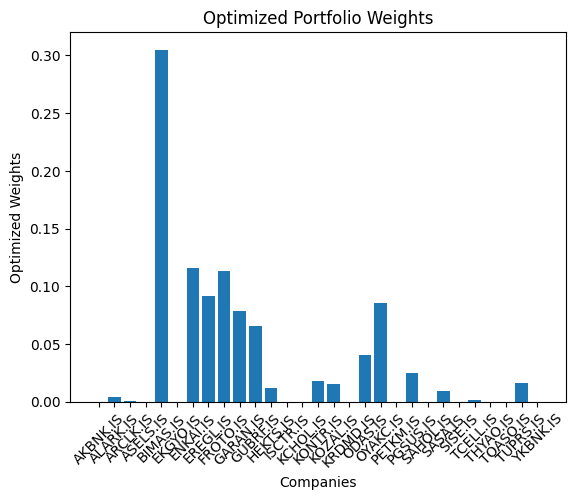

In [9]:
prob.solve()

if prob.status == cp.OPTIMAL:
    print("Optimization was successful.")

    optimized_weights = w.value

   
    plt.bar(range(n), optimized_weights, tick_label=companies)
    plt.xlabel('Companies')
    plt.ylabel('Optimized Weights')
    plt.title('Optimized Portfolio Weights')
    plt.xticks(rotation=45)
    plt.show()

else:
    print("Optimization failed. Status:", prob.status)
